In [42]:
import sklearn as skl

In [43]:
import csv

In [44]:
import pandas as pd

In [45]:
#memanggil data yang ingin di analisis regresi logistik biner
data= pd.read_csv('E:/Anggok/dataproject.csv', sep=';')

In [46]:
print(data)

     gender  ice_cream  video  puzzle
0         0          2     47      57
1         1          1     63      61
2         0          3     58      31
3         0          3     53      56
4         0          1     53      61
..      ...        ...    ...     ...
195       1          1     42      56
196       1          1     36      46
197       1          1     55      52
198       1          1     58      61
199       1          3     53      61

[200 rows x 4 columns]


In [47]:
#melihat summary data
data.describe()

,gender,ice_cream,video,puzzle
count,200.00000,200.000000,200.000000,200.000000
mean,0.54500,1.815000,51.850000,52.405000
std,0.49922,0.856999,9.900891,10.735793
min,0.00000,1.000000,26.000000,26.000000
25%,0.00000,1.000000,44.000000,46.000000
50%,1.00000,2.000000,53.000000,52.000000
75%,1.00000,3.000000,58.000000,61.000000
max,1.00000,3.000000,74.000000,71.000000


In [48]:
#check data kosong
data.isnull().sum()

gender       0
ice_cream    0
video        0
puzzle       0
dtype: int64

In [49]:
#melihat proporsi data gender
data['gender'].value_counts()

1    109
0     91
Name: gender, dtype: int64

In [50]:
import sklearn.model_selection as ms

In [51]:
#mendefinisikan variabel respon dan variabel predictor
X= data[['ice_cream','video','puzzle']]
y= data.gender

In [52]:
#data testing dan data training dengan library
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:
import sklearn.linear_model as lm

In [54]:
#membangun model regresi logististik biner
model= lm.LogisticRegression (solver='lbfgs')

In [55]:
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
#Koefisien regresi logistik
print(model.coef_)

[[ 0.11405547 -0.03395724  0.03489613]]


In [57]:
y_prediksi= model.predict(X_test)

In [58]:
print(y_prediksi)

[1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 0 1]


In [59]:
X_test.head()

,ice_cream,video,puzzle
18,3,55,61
170,2,50,43
107,2,51,33
98,2,39,41
177,1,53,41


In [60]:
y_test.head(1)

18    0
Name: gender, dtype: int64

In [61]:
import sklearn.metrics as met

In [62]:
#mengukur kinerja model
confusionmatrix = met.confusion_matrix(y_test,y_prediksi)

In [63]:
#membentuk matrix
print(confusionmatrix)

[[ 6 11]
 [ 6 17]]


In [64]:
#nilai kinerja model
score= model.score(X_test, y_test)
print(score)

0.575


In [65]:
precision = met.precision_score(y_test, y_prediksi)
print(precision)

0.6071428571428571


In [66]:
auc = met.roc_auc_score(y_test, y_prediksi)
print(auc)

0.5460358056265984


In [67]:
import matplotlib.pyplot as plt

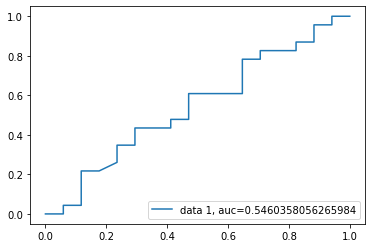

In [68]:
#Grafik ROC 
y_pred_proba = model.predict_proba(X_test)[::,1] 
fp,tp, _ = met.roc_curve(y_test, y_pred_proba)
auc = met.roc_auc_score(y_test, y_pred_proba)
plt.plot(fp, tp, label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()